# 송인욱 과제

In [78]:
import csv
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [79]:
f = open('../Data/daegu_utf8.csv', 'r', encoding='utf-8')
weather_df = csv.reader(f)
header = next(weather_df)
print(header)
count = 1
for row in weather_df:
    print(row)
    if count >= 5:
        break
    count += 1
f.close()

['날짜', '지점', '평균기온', '최저기온', '최고기온']
['1909-01-01', '143', '-4.1', '-8.0', '0.1']
['1909-01-02', '143', '-0.8', '-6.7', '6.1']
['1909-01-03', '143', '1.0', '-2.4', '3.6']
['1909-01-04', '143', '4.2', '0.0', '9.2']
['1909-01-05', '143', '3.4', '-0.4', '9.0']


In [80]:
def meanTemp(start_year, end_year, search_month):
    f = open('../Data/daegu_utf8.csv', 'r', encoding='utf-8')
    weather_df = csv.reader(f)
    next(weather_df)

    max_data = {}                                                      # 빈 딕셔너리 생성
    min_data = {}

    for row in weather_df:
        date_string = row[0].split('-')
        year = int(date_string[0])
        month = int(date_string[1])
        if year >= start_year and year <= end_year:                    # 조건 부여
            if month == search_month:
                if year not in max_data.keys():                        # 딕셔너리 밸류값으로 추가
                    max_data[year] = [float(row[-1])]
                    min_data[year] = [float(row[-2])]
                else:
                    max_data[year].append(float(row[-1]))
                    min_data[year].append(float(row[-2]))
            
    x_year = list(max_data.keys())

    for i in x_year:                                                   # 딕셔너리 밸류값 평균으로 바꿈
        max_data[i] = round(sum(max_data[i]) / len(max_data[i]),2)
        min_data[i] = round(sum(min_data[i]) / len(min_data[i]),2)

    max_mean = list(max_data.values())
    min_mean = list(min_data.values())

    # 문자 출력
    print(f'{start_year}년 부터 {end_year}년 까지 {search_month}월의 기온 변화', '\n')
    print(f'{search_month}월 최저기온 평균:')
    minStr = str(min_mean[0])
    for i in min_mean[1:]:
        minStr = minStr + ', ' + str(i)
    print(minStr)

    print(f'{search_month}월 최고기온 평균:')
    maxStr = str(max_mean[0])
    for i in max_mean[1:]:
        maxStr = maxStr + ', ' + str(i)
    print(maxStr)

    # 폰트 설정

    system_name = platform.system()
    if system_name == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    elif system_name == 'Darwin':
        plt.rc('font', family='AppleGothic')
    elif system_name == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
        font_name = fm.FontProperties(fname=path, size=12)
        plt.rc(font_name)
    else:
        raise Exception('not support')
    plt.rcParams['axes.unicode_minus'] = False


    plt.figure(figsize=(15,7))
    plt.plot(x_year, max_mean, color='r', marker='s', label='최고기온')
    plt.plot(x_year, min_mean, color='b', marker='o', label='최저기온')
    plt.title(f'{start_year}년 부터 {end_year}년 까지 {search_month}월의 기온 변화')
    plt.legend()
    plt.show()

2001년 부터 2010년 까지 7월의 기온 변화 

7월 최저기온 평균:
24.1, 22.76, 19.8, 23.42, 22.99, 21.52, 21.45, 24.79, 21.32, 23.45
7월 최고기온 평균:
31.96, 30.4, 26.15, 31.91, 30.82, 27.74, 28.84, 33.06, 29.38, 31.29


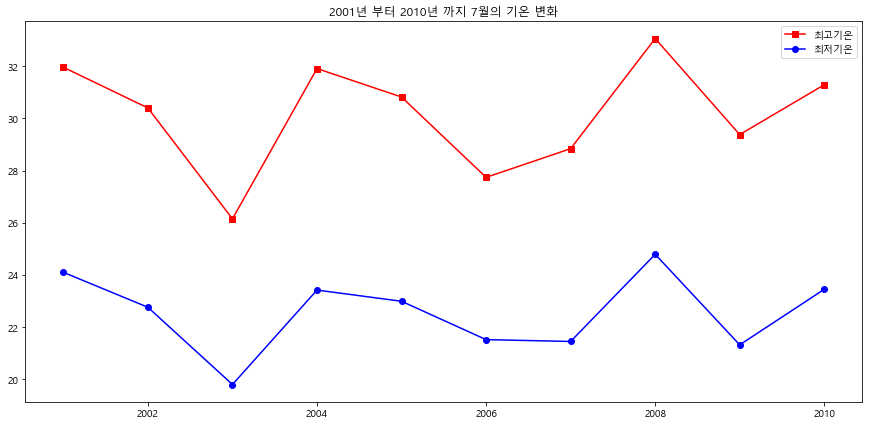

In [81]:
meanTemp(2001,2010,7)